# CUSTOMER SEGMENTATION

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

# Loading the dataset

In [2]:
df = pd.read_csv("Customer Data.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# EDA

In [3]:
df.shape

(8950, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# filling mean value in place of missing values in the dataset
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

In [8]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
# checking for duplicate rows in the dataset
df.duplicated().sum()

0

In [10]:
# dropping CUST_ID column because it is not used
df.drop(columns=["CUST_ID"],axis=1,inplace=True)

In [11]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

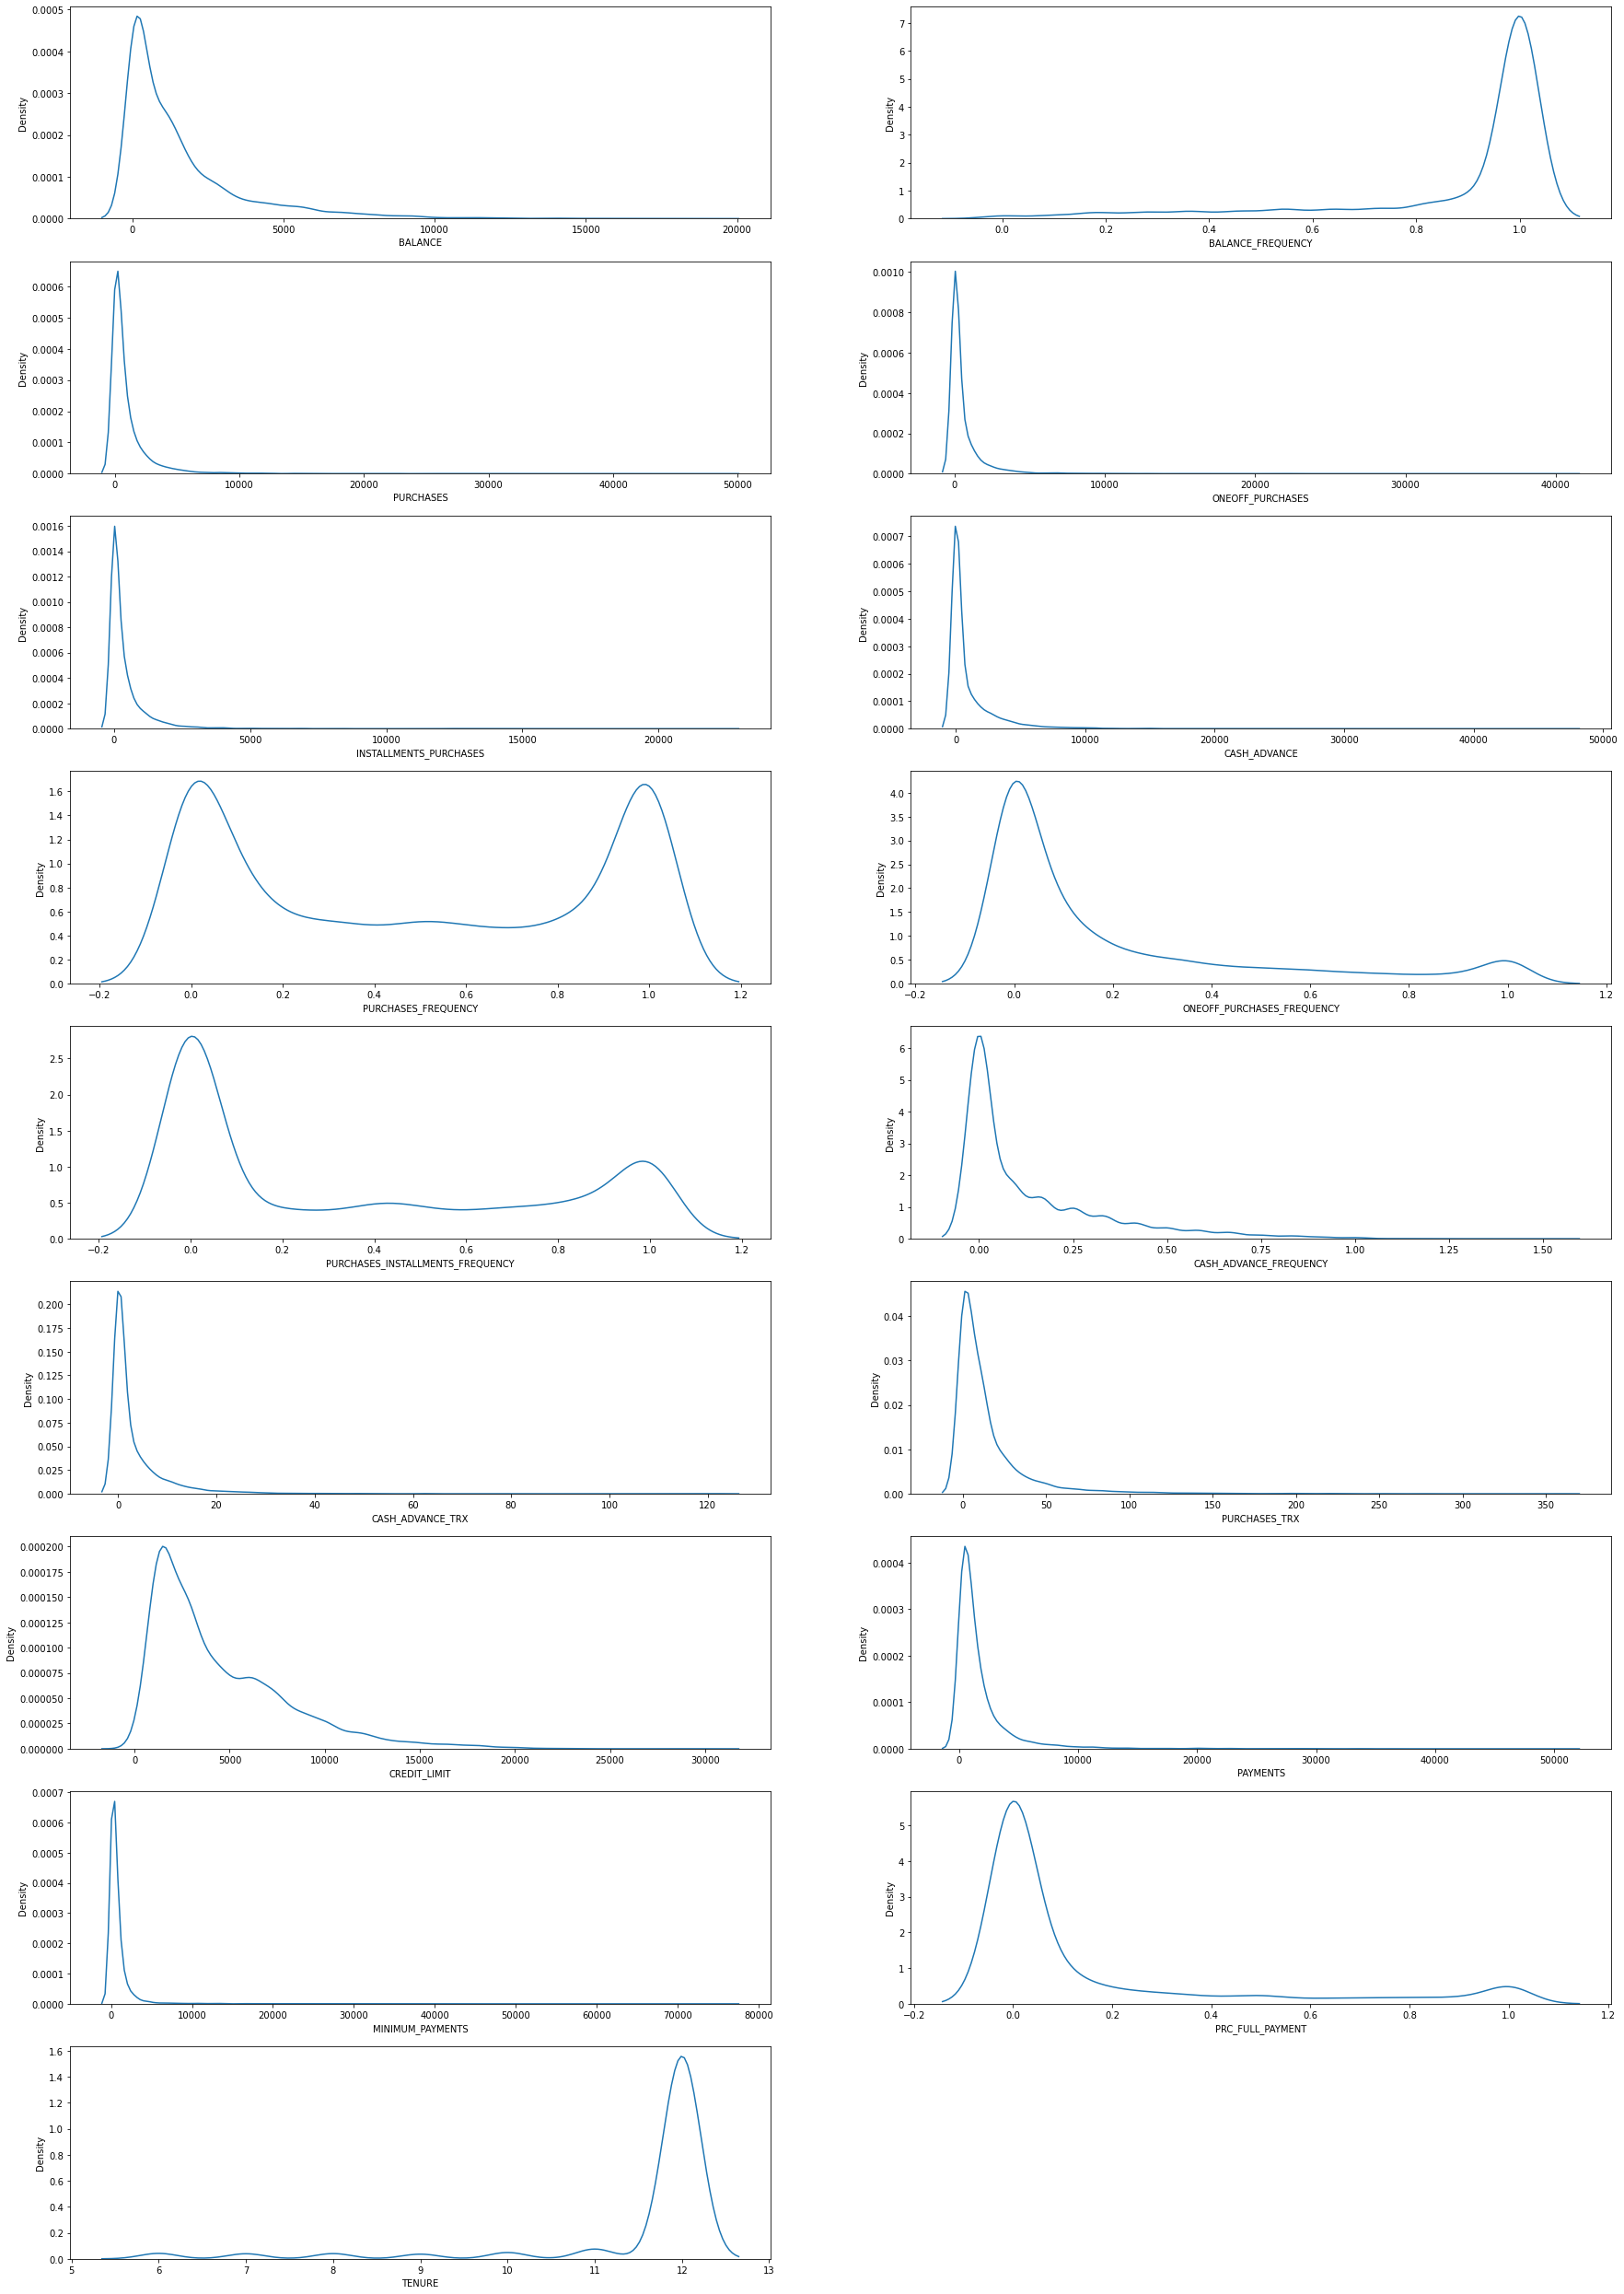

In [12]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

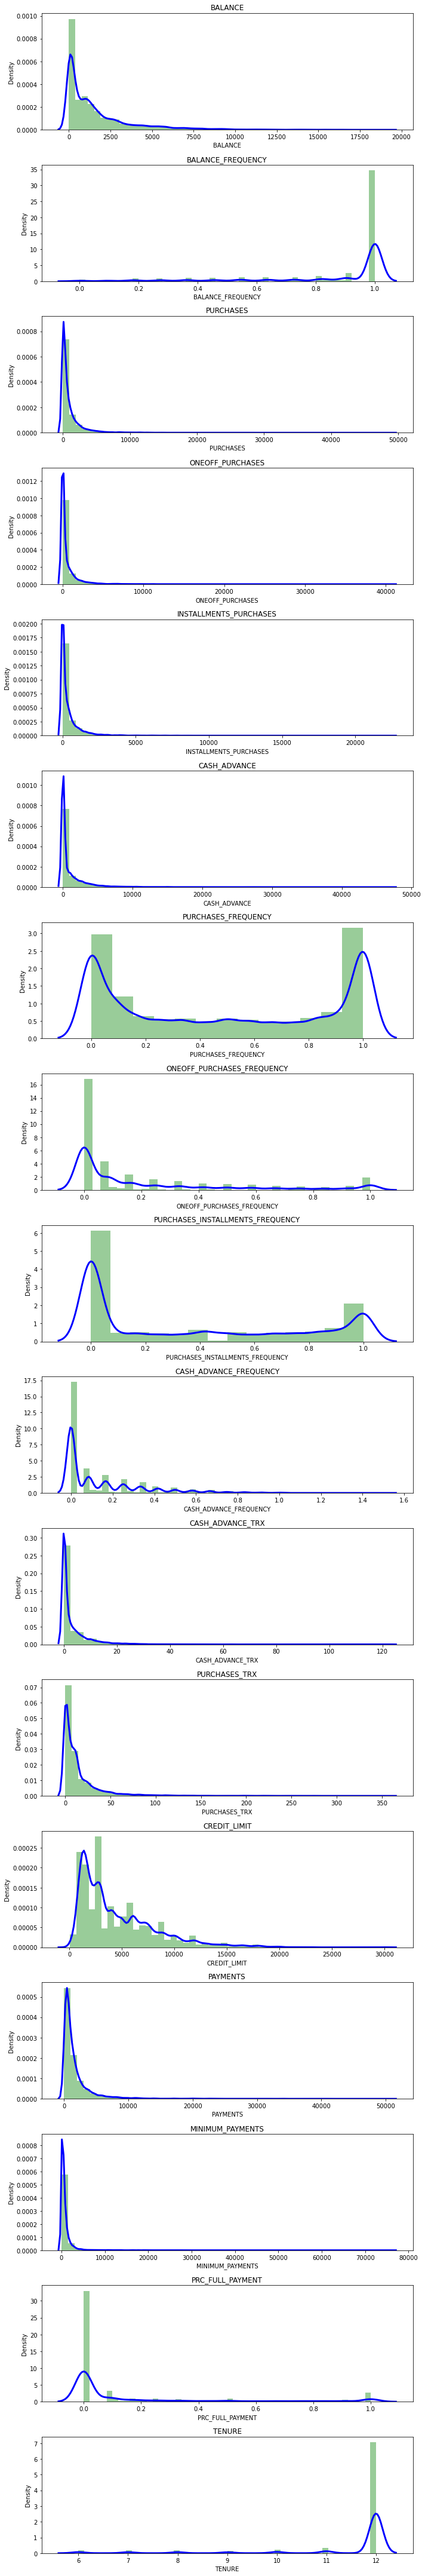

In [13]:
plt.figure(figsize=(10,60))
for i in range(0,17):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={'color':'b','bw': 0.1,'lw':3,'label':'KDE'},hist_kws={'color':'g'})
    plt.title(df.columns[i])
plt.tight_layout()

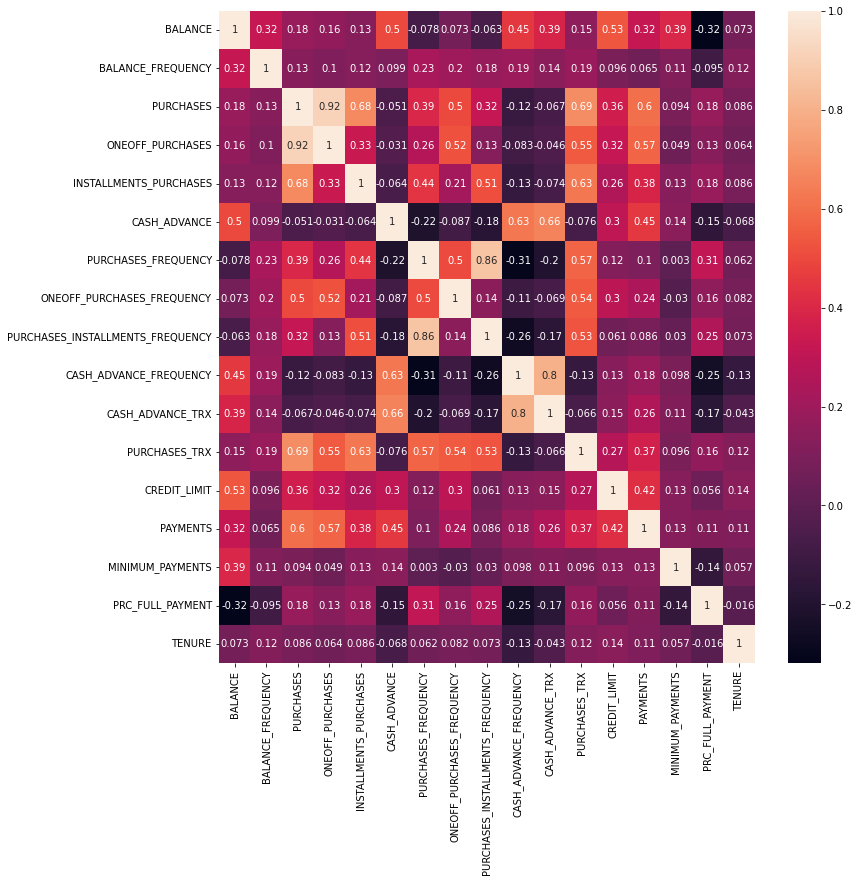

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Scaling the DataFrame

In [15]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [16]:
scaled_df = scalar.fit_transform(df)

# Dimensionality reduction

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.682221,-1.076451
1,-1.138297,2.506475
2,0.969686,-0.383510
3,-0.873630,0.043163
4,-1.599434,-0.688580
...,...,...
8945,-0.359629,-2.016143
8946,-0.564371,-1.639130
8947,-0.926204,-1.810785
8948,-2.336552,-0.657972


# Hyperparameter tuning
## Finding 'k' value by Elbow Method

In [19]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

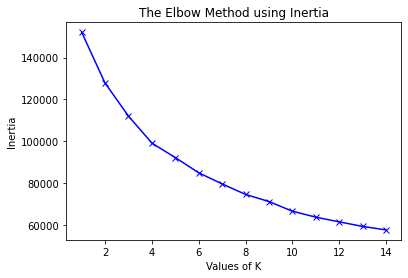

In [20]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

# Model Building using KMeans

In [21]:

kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'Group':kmeans_model.labels_})],axis=1)

# Visualizing the clustered dataframe

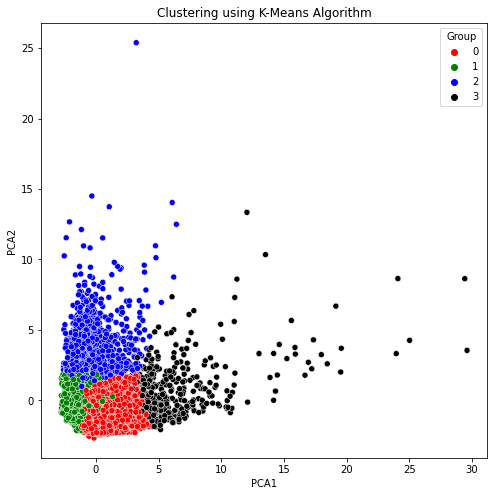

In [22]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="Group",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [23]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
# inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595
1,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429
2,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312
3,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100


In [24]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df,pd.DataFrame({'Group':kmeans_model.labels_})],axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Group
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [25]:
cluster_df['Group'] = cluster_df['Group'].replace(to_replace=0, value='Group_A')

In [26]:
cluster_df['Group'] = cluster_df['Group'].replace(to_replace=1, value='Group_B')

In [27]:
cluster_df['Group'] = cluster_df['Group'].replace(to_replace=2, value='Group_C')

In [28]:
cluster_df['Group'] = cluster_df['Group'].replace(to_replace=3, value='Group_D')

In [29]:
cluster_df['Group']

0       Group_B
1       Group_C
2       Group_A
3       Group_B
4       Group_B
         ...   
8945    Group_A
8946    Group_A
8947    Group_A
8948    Group_B
8949    Group_B
Name: Group, Length: 8950, dtype: object

In [30]:
cluster_1_df = cluster_df[cluster_df["Group"]==0]
cluster_1_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Group


In [31]:
cluster_2_df = cluster_df[cluster_df["Group"]==1]
cluster_2_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Group


In [32]:
cluster_3_df = cluster_df[cluster_df["Group"]==2]
cluster_3_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Group


In [33]:
cluster_4_df = cluster_df[cluster_df["Group"] == 3]
cluster_4_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Group


<AxesSubplot:xlabel='Group', ylabel='count'>

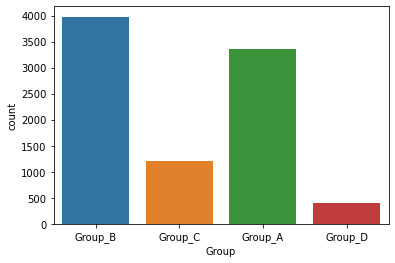

In [34]:
#Visualization
sns.countplot(x='Group', data=cluster_df)


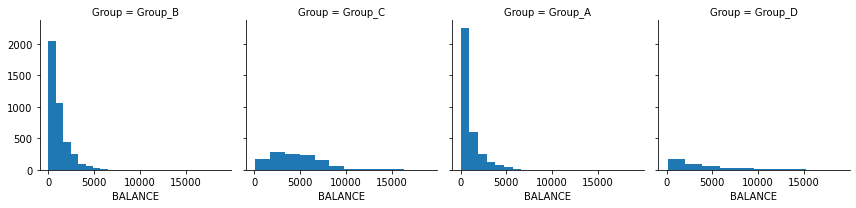

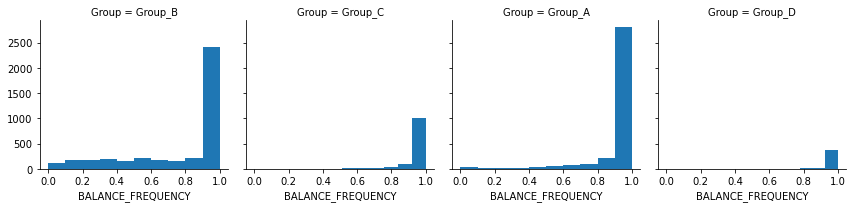

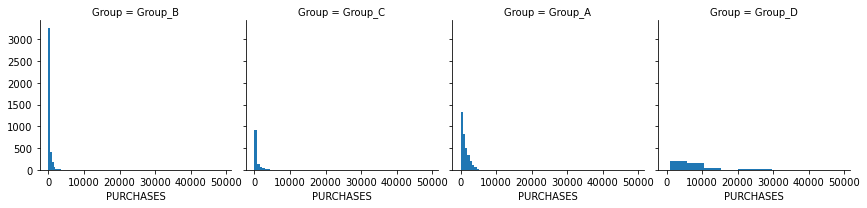

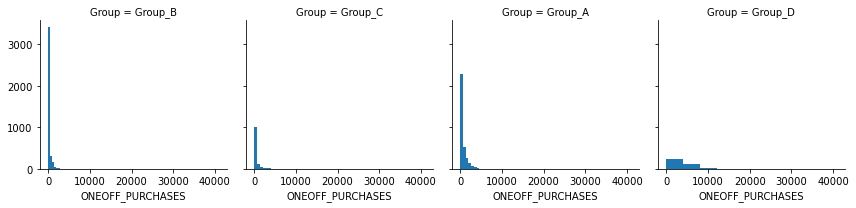

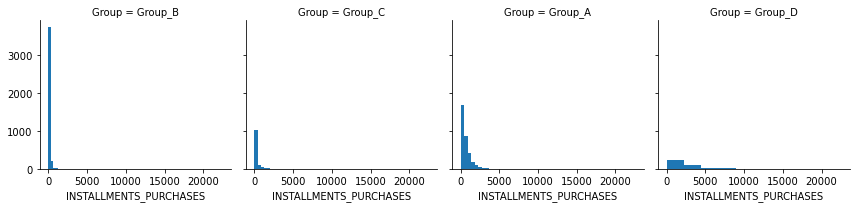

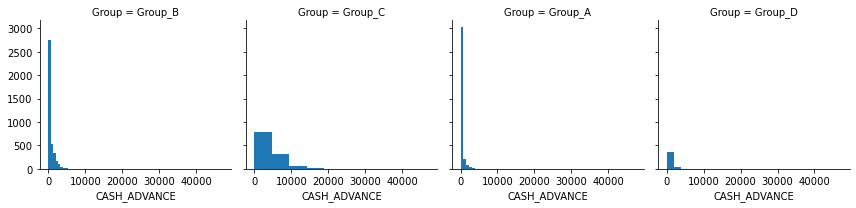

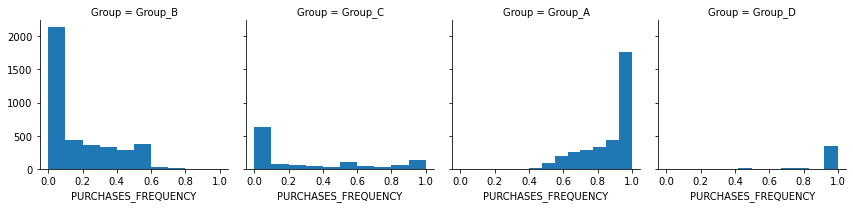

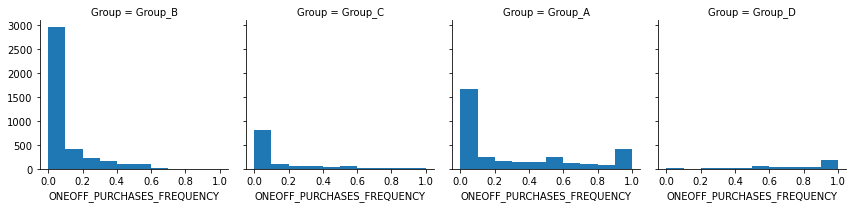

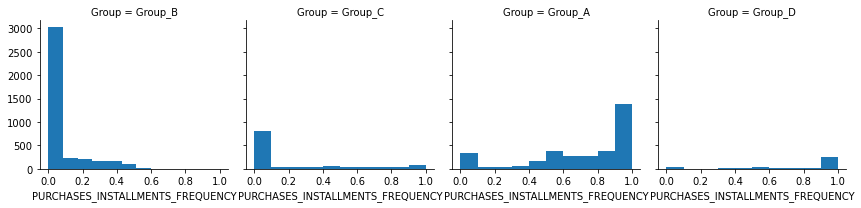

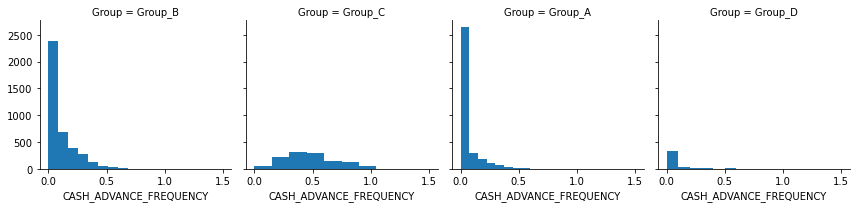

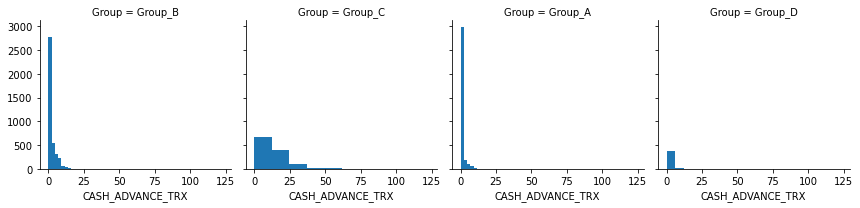

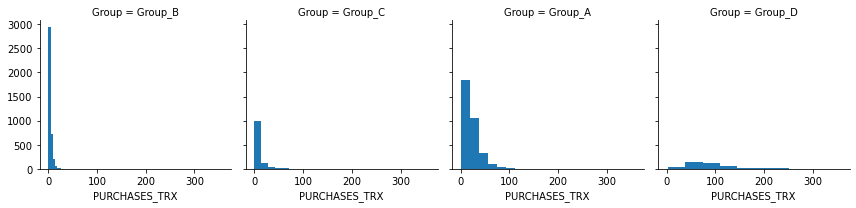

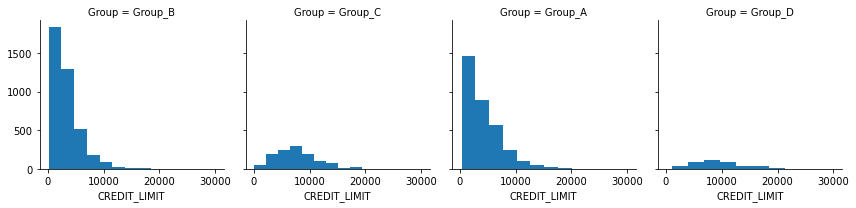

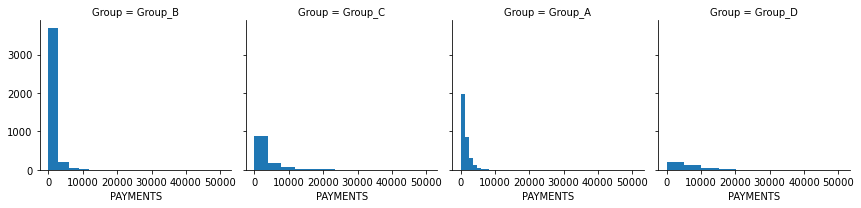

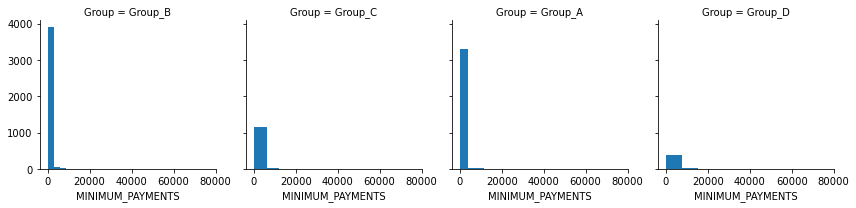

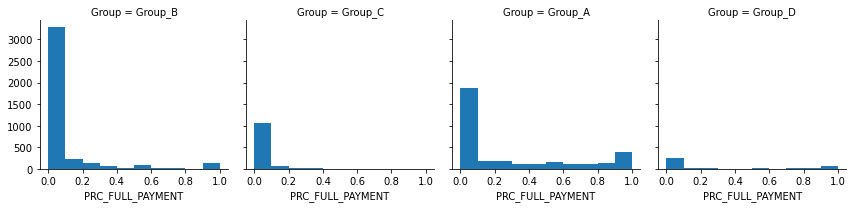

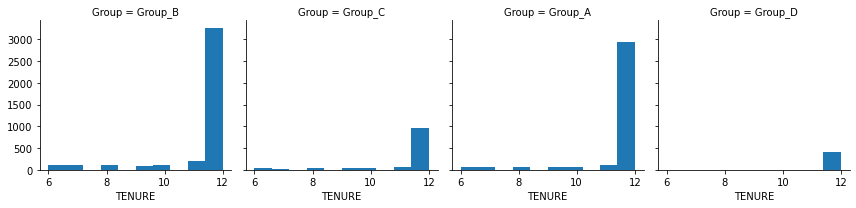

In [35]:
for c in cluster_df.drop(['Group'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Group')
    grid= grid.map(plt.hist, c)
plt.show()

# Saving the kmeans clustering model and the data with cluster label

In [36]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [37]:
cluster_df.to_csv("Clustered_Customer_Data.csv")

# Training and Testing the model accuracy using decision tree

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
#Split Dataset
X = cluster_df.drop(['Group'],axis=1)
y= cluster_df[['Group']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)


In [40]:
X_train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8311,1304.669711,1.000000,938.95,839.95,99.00,718.244077,0.875000,0.750000,0.625000,0.250000,3,19,6000.0,397.559825,221.765960,0.000000,8
7257,0.000000,0.000000,226.07,0.00,226.07,0.000000,0.583333,0.000000,0.583333,0.000000,0,7,2500.0,0.000000,864.206542,0.000000,12
6140,3855.225836,1.000000,0.00,0.00,0.00,1837.620008,0.000000,0.000000,0.000000,0.416667,5,0,7500.0,977.203331,875.725207,0.000000,12
5155,2762.536531,1.000000,0.00,0.00,0.00,478.933445,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,652.759069,6038.567518,0.000000,12
7727,65.915182,0.727273,840.00,0.00,840.00,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1000.0,1014.023858,185.815051,0.857143,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7772,1757.439933,0.833333,0.00,0.00,0.00,2408.007601,0.000000,0.000000,0.000000,0.166667,6,0,2500.0,175.115831,450.616731,0.000000,6
6192,3155.155315,1.000000,0.00,0.00,0.00,147.664311,0.000000,0.000000,0.000000,0.166667,2,0,3500.0,975.901669,949.523933,0.000000,12
7527,233.092662,1.000000,2613.65,945.45,1668.20,0.000000,1.000000,0.333333,1.000000,0.000000,0,39,6000.0,2255.232796,427.743632,0.666667,12
6724,55.039565,1.000000,571.52,0.00,571.52,0.000000,1.000000,0.000000,1.000000,0.000000,0,44,3000.0,596.548970,176.777412,1.000000,12


In [41]:
X_test

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3098,380.351858,0.909091,1216.21,1216.21,0.00,145.058195,0.166667,0.166667,0.000000,0.083333,1,9,3000.0,1605.939594,135.474623,0.111111,12
8303,29.040058,0.909091,289.63,0.00,289.63,0.000000,1.000000,0.000000,0.909091,0.000000,0,11,1000.0,243.424066,88.003769,0.000000,11
5242,145.320241,0.636364,530.81,0.00,530.81,0.000000,0.583333,0.000000,0.500000,0.000000,0,7,5500.0,143.114001,196.881446,0.000000,12
525,1117.635883,1.000000,0.00,0.00,0.00,97.200877,0.000000,0.000000,0.000000,0.250000,3,0,1200.0,308.089987,361.250401,0.000000,12
289,5469.851311,1.000000,0.00,0.00,0.00,512.792701,0.000000,0.000000,0.000000,0.166667,3,0,6000.0,1362.966798,2019.027883,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,98.420888,1.000000,907.37,907.37,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,10000.0,908.907467,184.723457,1.000000,12
8402,1355.437063,1.000000,0.00,0.00,0.00,407.884977,0.000000,0.000000,0.000000,0.250000,6,0,1500.0,642.558759,412.709640,0.000000,12
5611,1371.015868,1.000000,180.00,180.00,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,2,3000.0,534.055194,866.123831,0.000000,12
6933,379.740550,1.000000,1348.41,546.21,802.20,0.000000,0.666667,0.416667,0.500000,0.000000,0,25,1300.0,430.736402,163.305423,0.000000,12


In [42]:
#Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logr_liblinear = LogisticRegression(verbose=1,solver='liblinear')

In [45]:
logr_liblinear.fit(X_train,y_train)

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

In [46]:
logr_liblinear.score(X_train,y_train)

0.9267358339984039

In [47]:
Y_pred_log=logr_liblinear.predict(X_test)

In [48]:
Y_pred_log1=logr_liblinear.predict(X_train)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [50]:
confusion_matrix(y_test,Y_pred_log)

array([[ 950,   43,    9,    2],
       [  83, 1090,   17,    0],
       [   7,   25,  332,    1],
       [  20,    0,    1,  105]], dtype=int64)

In [51]:
print ("Accuracy : ", accuracy_score(y_test, Y_pred_log))

Accuracy :  0.9225325884543761


In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(classification_report(y_test,Y_pred_log))

              precision    recall  f1-score   support

     Group_A       0.90      0.95      0.92      1004
     Group_B       0.94      0.92      0.93      1190
     Group_C       0.92      0.91      0.92       365
     Group_D       0.97      0.83      0.90       126

    accuracy                           0.92      2685
   macro avg       0.93      0.90      0.92      2685
weighted avg       0.92      0.92      0.92      2685



In [54]:
#random_forest_classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
clf = RandomForestClassifier(n_estimators = 100)

In [57]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
clf.score(X_train,y_train)

1.0

In [59]:
y_pred_rf = clf.predict(X_test)

In [60]:
print ("Accuracy : ", accuracy_score(y_test, y_pred_rf))

Accuracy :  0.9556797020484171


In [61]:
y_pred_rf1 = clf.predict(X_train)

In [62]:
print(clf)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_pred_rf1))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred_rf))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred_rf))

RandomForestClassifier()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       1.00      1.00      1.00      2363
     Group_B       1.00      1.00      1.00      2786
     Group_C       1.00      1.00      1.00       833
     Group_D       1.00      1.00      1.00       283

    accuracy                           1.00      6265
   macro avg       1.00      1.00      1.00      6265
weighted avg       1.00      1.00      1.00      6265

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       0.95      0.96      0.96      1004
     Group_B       0.96      0.97      0.97      1190
     Group_C       0.94      0.93      0.93       365
     Group_D       0.96      0.87      0.91       126

    accuracy                           0.96      2685
   macro avg       0.95      0.93      0.94      2685
weighted avg 

In [63]:
#Hyperparameter Tuning on RandomForest
from sklearn.model_selection import RandomizedSearchCV

In [64]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [65]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [66]:
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [67]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  12.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  12.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  18.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  18.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [68]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 10}

In [69]:
rf_new = RandomForestClassifier(n_estimators=900,min_samples_split=5,min_samples_leaf=5,max_features='sqrt',max_depth=10)

In [70]:
rf_new.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5, n_estimators=900)

In [71]:
y_pred_rg = rf_new.predict(X_test)

In [72]:
y_pred_rg_train = rf_new.predict(X_train)

In [73]:
confusion_matrix(y_test, y_pred_rg)

array([[ 954,   38,    8,    4],
       [  27, 1151,   12,    0],
       [  12,   23,  330,    0],
       [  20,    1,    1,  104]], dtype=int64)

In [74]:
print ("Accuracy : ", accuracy_score(y_test, y_pred_rg))

Accuracy :  0.9456238361266294


In [75]:
print(rf_new)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_pred_rg_train))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred_rg))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred_rg))

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5, n_estimators=900)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       0.97      0.99      0.98      2363
     Group_B       0.98      0.98      0.98      2786
     Group_C       0.99      0.97      0.98       833
     Group_D       0.99      0.93      0.96       283

    accuracy                           0.98      6265
   macro avg       0.98      0.97      0.97      6265
weighted avg       0.98      0.98      0.98      6265

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       0.94      0.95      0.95      1004
     Group_B       0.95      0.97      0.96      1190
     Group_C       0.94      0.90      0.92       365
     Group_D       0.96      0.83      0.89       126

    ac

In [76]:
!pip install lightgbm

In [77]:
import lightgbm as lgb
light = lgb.LGBMClassifier()
light.fit(X_train,y_train)

LGBMClassifier()

In [78]:
lgb_pred=light.predict(X_test)

In [79]:
light.score(X_train,y_train)

1.0

In [80]:
print ("Accuracy : ", accuracy_score(y_test, lgb_pred))

Accuracy :  0.9635009310986965


In [81]:
confusion_matrix(y_test, lgb_pred)

array([[ 968,   24,    9,    3],
       [  16, 1161,   13,    0],
       [   3,   19,  342,    1],
       [  10,    0,    0,  116]], dtype=int64)

In [82]:
print(classification_report(y_test, lgb_pred))

              precision    recall  f1-score   support

     Group_A       0.97      0.96      0.97      1004
     Group_B       0.96      0.98      0.97      1190
     Group_C       0.94      0.94      0.94       365
     Group_D       0.97      0.92      0.94       126

    accuracy                           0.96      2685
   macro avg       0.96      0.95      0.95      2685
weighted avg       0.96      0.96      0.96      2685



In [83]:
from lightgbm import LGBMClassifier

In [84]:
from sklearn.model_selection import GridSearchCV, KFold

In [85]:
lgb_tuned =LGBMClassifier(random_state=3,n_jobs=-1)

params = {'n_estimators':np.arange(80,120)}

gscv = GridSearchCV(lgb_tuned,param_grid=params,cv=3,scoring='f1',n_jobs=-1,verbose=True)
gscv.fit(X_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=3), n_jobs=-1,
             param_grid={'n_estimators': array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119])},
             scoring='f1', verbose=True)

In [86]:
gscv.best_params_

{'n_estimators': 80}

In [87]:
lgb_tuned = LGBMClassifier(random_state=3,n_jobs=-1,n_estimators=80)

In [88]:
lgb_tuned.fit(X_train,y_train)

LGBMClassifier(n_estimators=80, random_state=3)

In [89]:
lgb_tuned.score(X_train,y_train)

1.0

In [90]:
lgb_pred1=lgb_tuned.predict(X_test)

In [91]:
lgb_pred_train=lgb_tuned.predict(X_train)

In [92]:
print ("Accuracy : ", accuracy_score(y_test, lgb_pred1))

Accuracy :  0.9616387337057728


In [93]:
confusion_matrix(y_test, lgb_pred1)

array([[ 966,   23,   10,    5],
       [  15, 1159,   16,    0],
       [   4,   19,  341,    1],
       [  10,    0,    0,  116]], dtype=int64)

In [94]:
from sklearn.metrics import classification_report

In [95]:
print(lgb_tuned)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, lgb_pred_train))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, lgb_pred1))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, lgb_pred1))

LGBMClassifier(n_estimators=80, random_state=3)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       1.00      1.00      1.00      2363
     Group_B       1.00      1.00      1.00      2786
     Group_C       1.00      1.00      1.00       833
     Group_D       1.00      1.00      1.00       283

    accuracy                           1.00      6265
   macro avg       1.00      1.00      1.00      6265
weighted avg       1.00      1.00      1.00      6265

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       0.97      0.96      0.97      1004
     Group_B       0.97      0.97      0.97      1190
     Group_C       0.93      0.93      0.93       365
     Group_D       0.95      0.92      0.94       126

    accuracy                           0.96      2685
   macro avg       0.95      0.95      0.95 

In [96]:
#Decision_Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [97]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [98]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9299813780260707


In [99]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 943   38   16    7]
 [  34 1127   29    0]
 [  14   29  319    3]
 [  17    1    0  108]]
              precision    recall  f1-score   support

     Group_A       0.94      0.94      0.94      1004
     Group_B       0.94      0.95      0.95      1190
     Group_C       0.88      0.87      0.88       365
     Group_D       0.92      0.86      0.89       126

    accuracy                           0.93      2685
   macro avg       0.92      0.90      0.91      2685
weighted avg       0.93      0.93      0.93      2685



In [100]:
dc_tuned =DecisionTreeClassifier()

params = {"criterion":['gini','entropy'],
         "max_depth":range(1,10),
         "min_samples_split":range(1,10),
         "min_samples_leaf":range(1,5)}

dscv = GridSearchCV(dc_tuned,param_grid=params,cv=10,n_jobs=-1,verbose=1)
dscv.fit(X_train,y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [101]:
dscv.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 9}

In [102]:
dscv_tuned = DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf=3,min_samples_split=3)

In [103]:
dscv_tuned.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       min_samples_split=3)

In [104]:
dscv_tuned.score(X_train,y_train)

0.9634477254588987

In [105]:
dscv_pred1=dscv_tuned.predict(X_test)

In [106]:
dscv_pred_train=dscv_tuned.predict(X_train)

In [107]:
print ("Accuracy : ", accuracy_score(y_test, dscv_pred1))

Accuracy :  0.9247672253258845


In [108]:
confusion_matrix(y_test, dscv_pred1)

array([[ 931,   47,   12,   14],
       [  31, 1130,   29,    0],
       [  21,   30,  312,    2],
       [  16,    0,    0,  110]], dtype=int64)

In [109]:
print(dscv_tuned)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, dscv_pred_train))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, dscv_pred1))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, dscv_pred1))

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       min_samples_split=3)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       0.97      0.96      0.97      2363
     Group_B       0.97      0.97      0.97      2786
     Group_C       0.95      0.93      0.94       833
     Group_D       0.92      0.95      0.94       283

    accuracy                           0.96      6265
   macro avg       0.95      0.95      0.95      6265
weighted avg       0.96      0.96      0.96      6265

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

     Group_A       0.93      0.93      0.93      1004
     Group_B       0.94      0.95      0.94      1190
     Group_C       0.88      0.85      0.87       365
     Group_D       0.87      0.87      0.87       126

    accuracy             

# Saving the Decision tree model for future prediction

In [110]:
import pickle
filename = 'final_model.sav'
pickle.dump(lgb_tuned, open(filename, 'wb'))
  
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9616387337057728 % Acuuracy
